In [3]:
!pip install plotly pandas matplotlib scipy --quiet

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import pearsonr

In [4]:
url_temp = 'https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv'
df_temp = pd.read_csv(url_temp, skiprows=1)
df_temp = df_temp.rename(columns={'Year': 'year', 'J-D': 'anomaly'})
df_temp = df_temp[['year', 'anomaly']].dropna()
df_temp.head()

,year,anomaly
0,1880,-.17
1,1881,-.09
2,1882,-.11
3,1883,-.18
4,1884,-.28


In [5]:
url_co2 = 'https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv'
df_co2 = pd.read_csv(url_co2)
world_co2 = df_co2[df_co2['country'] == 'World'][['year', 'co2']].dropna()
world_co2.head()

,year,co2
49295,1750,9.306
49296,1751,9.407
49297,1752,9.505
49298,1753,9.610
49299,1754,9.734


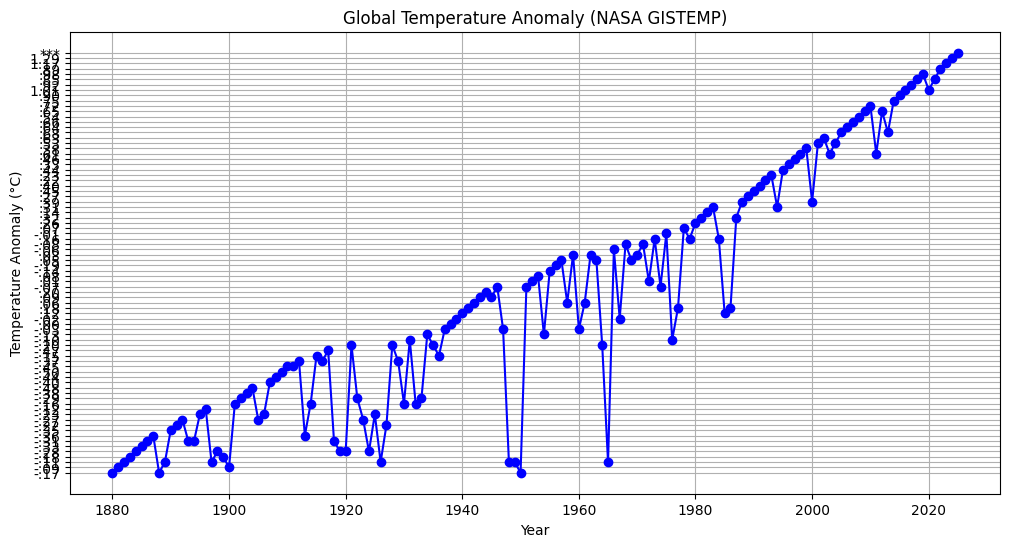

In [6]:
plt.figure(figsize=(12,6))
plt.plot(df_temp['year'], df_temp['anomaly'], marker='o', color='blue')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.title('Global Temperature Anomaly (NASA GISTEMP)')
plt.grid(True)
plt.show()

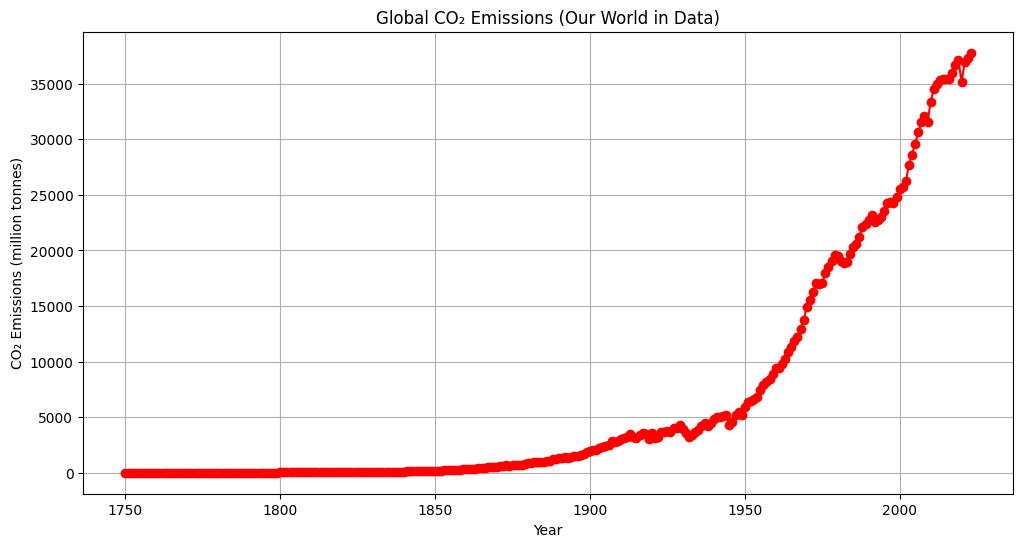

In [7]:
plt.figure(figsize=(12,6))
plt.plot(world_co2['year'], world_co2['co2'], marker='o', color='red')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions (million tonnes)')
plt.title('Global CO₂ Emissions (Our World in Data)')
plt.grid(True)
plt.show()

In [8]:
fig = px.line(world_co2, x='year', y='co2', title='Global CO₂ Emissions (Interactive)')
fig.show()

In [11]:
# Find common years (force integer type if necessary)
temp_years = df_temp['year'].astype(int)
co2_years = world_co2['year'].astype(int)
common_years = sorted(set(temp_years).intersection(set(co2_years)))

# Filter datasets to common years
df_temp_common = df_temp[df_temp['year'].isin(common_years)].sort_values('year')
world_co2_common = world_co2[world_co2['year'].isin(common_years)].sort_values('year')

# Convert to numeric
anomaly = pd.to_numeric(df_temp_common['anomaly'], errors='coerce')
co2 = pd.to_numeric(world_co2_common['co2'], errors='coerce')

# Drop any rows where either is NaN
mask = anomaly.notna() & co2.notna()
anomaly = anomaly[mask]
co2 = co2[mask]

print("Length of anomaly:", len(anomaly))
print("Length of co2:", len(co2))

if len(anomaly) > 1 and len(co2) > 1:
    corr, p_value = pearsonr(anomaly, co2)
    print(f'Pearson correlation coefficient: {corr:.2f}')
    print(f'P-value: {p_value:.3g}')
else:
    print("Not enough data points to compute correlation. Please check your data.")

Length of anomaly: 0
Length of co2: 0
Not enough data points to compute correlation. Please check your data.


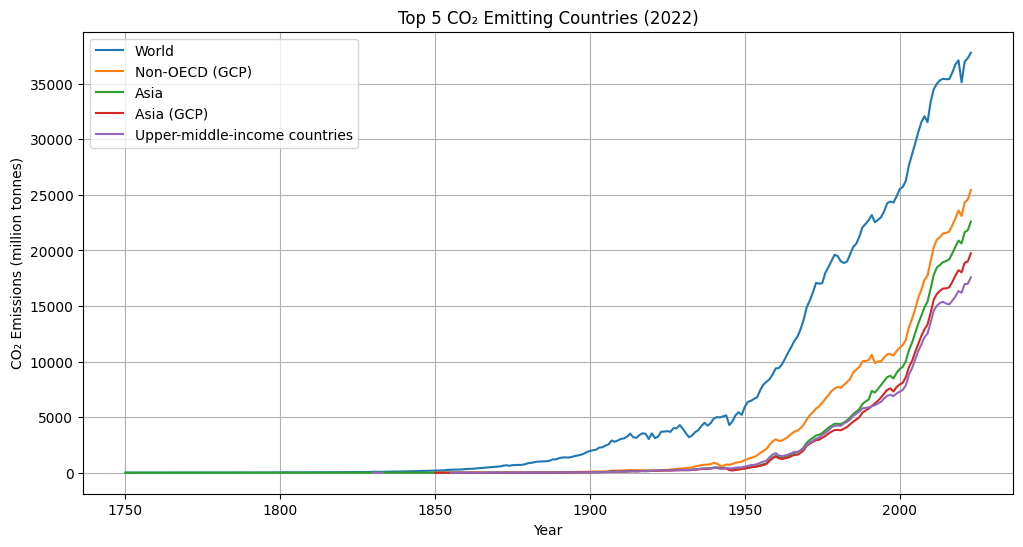

In [12]:
year = 2022
top_countries = df_co2[df_co2['year'] == year].sort_values('co2', ascending=False).head(5)['country'].tolist()
df_top = df_co2[df_co2['country'].isin(top_countries)]

# Plot emissions over time for these countries
plt.figure(figsize=(12,6))
for country in top_countries:
    plt.plot(df_top[df_top['country'] == country]['year'], df_top[df_top['country'] == country]['co2'], label=country)
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions (million tonnes)')
plt.title(f'Top 5 CO₂ Emitting Countries ({year})')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
import plotly.express as px

# Prepare data for a recent year
year = 2022
df_map = df_co2[df_co2['year'] == year]

fig = px.choropleth(
    df_map,
    locations="iso_code",
    color="co2",
    hover_name="country",
    color_continuous_scale="Reds",
    title=f"CO₂ Emissions by Country ({year})"
)
fig.show()